In [95]:
!git clone https://github.com/roneysco/Fake.br-Corpus.git

fatal: destination path 'Fake.br-Corpus' already exists and is not an empty directory.


In [96]:
!ls Fake.br-Corpus/full_texts/

fake  fake-meta-information  true  true-meta-information


In [0]:
import pandas as pd

In [0]:
# Função que recebe path de pasta contendo arquivos de texto e retorna lista com conteúdo de cada um dos arquivos texto 
def txtToList(path, lista):
  """
    Cria lista de strings (lista) com arquivos txt contidos em path.
    lista deve ser uma lista vazia pré-definida;
    path deve terminar em '/*'

  """
  import glob
  import io
  filesList = sorted(glob.glob(path))
  length = len(filesList)
  for i in range(length):
    file = open(filesList[i], mode='r', encoding="utf-8")
    text = file.read()
    file.close()
    lista.append(text)

In [0]:
allfakes = []
txtToList('Fake.br-Corpus/full_texts/fake/*', allfakes)

alltrue = []
txtToList('Fake.br-Corpus/full_texts/true/*', alltrue)

In [100]:
allfakes[:10]

['Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação pa

In [101]:
len(alltrue), len(allfakes)

(3600, 3600)

In [102]:
# Cria dataframe com coluna 'texto' com todas as fakenews + coluna 'classe' = 0
fakenews = pd.DataFrame(allfakes)
fakenews.columns = ['texto']
fakenews['classe'] = 0

# Cria dataframe com coluna 'texto' c/ todas as truenews + coluna 'classe' = 1
truenews = pd.DataFrame(alltrue)
truenews.columns = ['texto']
truenews['classe'] = 1

# Concatena os dois datasets
dfs = [fakenews, truenews]
allnews = pd.concat(dfs)

# Exibe primeiros registros do dataframe allnews
allnews.head()

,texto,classe
0,"Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação ...",0
1,"Dr. Ray peita Bolsonaro, chama-o de conservador fake em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses (ou algo do tipo). Deveria ter dito: Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto medo de venda aos chineses é pretexto para evitar a privatização....",0
2,"Reinaldo Azevedo desmascarado pela Polícia Federal. O mais ferrenho crítico do presidenciável Jair Bolsonaro foi desmascarado em um grampo telefônico em conversas com a irmã de Aécio Neves. Na conversa eles debochavam do juiz Sergio Moro e da operação Lava Jato.\n\nAgora ficou clara a intenção do jornalista de fazer defesas tão ferrenhas dos tucanos em suas colunas na Veja e Jovem Pan. Amigo íntimo da família Neves e do alto tucanato ele fazia propaganda psdbista ao invés de jornalismo. O jornalista Reinaldo Azevedo teve uma conversa com Andrea Neves, irmã do senador afastado Aécio Neves, interceptada pela Polícia Federal. O assunto tratado são as acusações contra Aécio contidas na delação da Odebrecht.\n\nNo diálogo, ele classificou uma reportagem da revista Veja, onde trabalhava e foi demitido, como nojenta. Ele se referia à edição que trouxe Aécio na capa, com o título A vez de Aécio.\n\nReinaldo criticou também o procurador-geral da República, Rodrigo Janot. Ele dizia que o...",0
3,"Relatório assustador do BNDES mostra dinheiro público DO BRASIL jorrando em países comunistas. . Um relatório intitulado ""BNDES: Transformado em Robin Hood às Avessas"" mostra como o BNDES, influenciado pelo governo petista, conseguiu beneficiar um pequeno percentual de empresas (escolhidas a dedo) e afundou a instituição com dívidas astronômicas. De autoria da deputada Cristiane Brasil, o documento foi apresentado na CPI do BNDES e mostra como o PT se apossou do banco para conceder benefícios a países ""comunistas"". Um trecho do documento destaca a existência de ""contratos secretos, suspeitas de prática de atos de corrupção e a criação de empresas de fachada para beneficiar países como Cuba, Angola, Venezuela, República Dominicana, Guatemala e outros"". Cristiane apontou uma gama de irregularidades na concessão de créditos e relatou que não houve respeito aos procedimentos da própria instituição nem tampouco às leis que regulamentam as operações. 

In [103]:
# Exibe últimos registros do dataframe allnews
allnews.tail()

,texto,classe
3595,"Para jornal britânico, ação contra Lula na Lava Jato será o julgamento do século na América Latina. Segundo o Financial Times, veredicto de culpa contra ex-presidente poderia desencadear protestos políticos em um momento em que o governo Temer tenta restaurar a confiança no País. LONDRES - Em reportagem publicada na edição desta terça-feira, 22, o jornal britânico Financial Times (FT) diz que o julgamento do ex-presidente Luiz Inácio Lula da Silva no âmbito da Operação Lava Jato vai ampliar as divisões no Brasil. Segundo a publicação, o legado do antigo líder popular será testado em tribunal. ""Em um ano já tumultuado e marcado pelo processo de impeachment da ex-presidente Dilma Rousseff, os brasileiros estão se preparando para o que promete ser o julgamento do século da América Latina - o início das audiências de corrupção contra seu antecessor e mentor, Lula da Silva"", escreveu o correspondente, em São Paulo, Joe Leahy. Segundo o jornal, um veredicto de culpa contra o líder do PT...",1
3596,"Temer diz que acionou PF e Cade para investigar aumentos no preço da gasolina em postos . Presidente também afirmou que estuda uma maneira para baratear o gás de cozinha para a população pobre. Ele deu entrevista nesta sexta a uma rádio do Rio Grande do Sul. . O presidente Michel Temer disse nesta sexta-feira (9) que acionou a Polícia Federal e o Conselho Administrativo de Defesa Econômica (Cade), ligado ao Ministério da Justiça, para investigar os aumentos de preços da gasolina nos postos de combustível. Segundo Temer, quando a Petrobras aumenta o preço nas refinarias, o valor nas bombas de combustível sobe. Mas, de acordo com o presidente, o valor nas bombas não desce quando a Petrobras diminui nas refinarias. Ele deu a declaração ao ser questionado, numa entrevista à Rádio Guaíba, do Rio Grande do Sul, sobre os sucessivos aumentos nos preços dos combustíveis . O preço médio da gasolina alcançou R$ 4,221 por litro no Brasil na semana passada , de acordo com dados da Agência Naci...",1
3597,"Os obstáculos políticos de Temer em 2017. Especialistas ouvidos pelo G1 avaliam que, além de ter de conter a crise econômica, o presidente terá de contornar no ano que vem a delação da Odebrecht, o processo no TSE e a baixa popularidade.. Em seu segundo ano no comando do Palácio do Planalto, o presidente Michel Temer terá o desafio de driblar, em 2017, uma série de obstáculos políticos para manter a governabilidade e ter força no Congresso Nacional para aprovar reformas como a previdenciária e a trabalhista, avaliam analistas ouvidos pelo G1 . O peemedebista, que assumiu a Presidência após o impeachment de Dilma Rousseff, vira o ano com um cenário político nebuloso. No horizonte do presidente da República, há preocupações com os imprevisíveis desdobramentos das delações premiadas dos executivos da Odebrecht, com o processo em andamento no Tribunal Superior Eleitoral (TSE) que pode cassar o mandato dele e com os baixíssimos índices de popularidade que ele tem registrado nos últimos...",1
3598,"Sexta-feira, 15 de setembro de 2017. Boa noite! Aqui estão as principais notícias para você terminar o dia bem-informado. Um Joesley Batista bem longe do tom de ""nós não vai ser preso"" do áudio entregue por descuido a Rodrigo Janot depôs hoje e se defendeu das acusações de irregularidades que levaram à perda dos benefícios da delação. Joesley foi para cima de Janot, que hoje fez sua despedida do cargo máximo da PGR. Chega de política? Será que vai dar neste finde? Porque começou o Rock In Rio! O G1 transmite os shows do palco principal. ""Eu fui mexer com os poderosos, com os donos do poder, e estou aqui agora"", disse Joesley Batista, em depoimento à Justiça Federal . Ele reclamou de Rodrigo Janot ter rescindido sua delação premiada. ""Acho que o procurador foi muito questionado pelo motivo da nossa imunidade. Acho que foi um ato de covardia dele. Nós fizemos a maior, a mais importante colaboração da história"", afirmou. Na primeira apar

In [104]:
# Criando duas novas features, para contagem de texto e contagem de sinais de pontuação

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

allnews['tamanho'] = allnews['texto'].apply(lambda x: len(x) - x.count(" "))
allnews['prop_pont'] = allnews['texto'].apply(lambda x: count_punct(x))
allnews.head()

,texto,classe,tamanho,prop_pont
0,"Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação ...",0,860,3.5
1,"Dr. Ray peita Bolsonaro, chama-o de conservador fake em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses (ou algo do tipo). Deveria ter dito: Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto medo de venda aos chineses é pretexto para evitar a privatização....",0,1260,2.7
2,"Reinaldo Azevedo desmascarado pela Polícia Federal. O mais ferrenho crítico do presidenciável Jair Bolsonaro foi desmascarado em um grampo telefônico em conversas com a irmã de Aécio Neves. Na conversa eles debochavam do juiz Sergio Moro e da operação Lava Jato.\n\nAgora ficou clara a intenção do jornalista de fazer defesas tão ferrenhas dos tucanos em suas colunas na Veja e Jovem Pan. Amigo íntimo da família Neves e do alto tucanato ele fazia propaganda psdbista ao invés de jornalismo. O jornalista Reinaldo Azevedo teve uma conversa com Andrea Neves, irmã do senador afastado Aécio Neves, interceptada pela Polícia Federal. O assunto tratado são as acusações contra Aécio contidas na delação da Odebrecht.\n\nNo diálogo, ele classificou uma reportagem da revista Veja, onde trabalhava e foi demitido, como nojenta. Ele se referia à edição que trouxe Aécio na capa, com o título A vez de Aécio.\n\nReinaldo criticou também o procurador-geral da República, Rodrigo Janot. Ele dizia que o...",0,1392,1.9
3,"Relatório assustador do BNDES mostra dinheiro público DO BRASIL jorrando em países comunistas. . Um relatório intitulado ""BNDES: Transformado em Robin Hood às Avessas"" mostra como o BNDES, influenciado pelo governo petista, conseguiu beneficiar um pequeno percentual de empresas (escolhidas a dedo) e afundou a instituição com dívidas astronômicas. De autoria da deputada Cristiane Brasil, o documento foi apresentado na CPI do BNDES e mostra como o PT se apossou do banco para conceder benefícios a países ""comunistas"". Um trecho do documento destaca a existência de ""contratos secretos, suspeitas de prática de atos de corrupção e a criação de empresas de fachada para beneficiar países como Cuba, Angola, Venezuela, República Dominicana, Guatemala e outros"". Cristiane apontou uma gama de irregularidades na concessão de créditos e relatou que não houve respeito aos procedimentos da própria instituição nem tamp

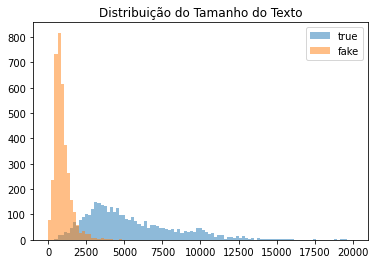

In [105]:
# Comparando distribuições de tamanho do texto
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0, 20000, 100)
pyplot.hist(allnews[allnews['classe']==1]['tamanho'], bins, alpha=0.5, label='true')
pyplot.hist(allnews[allnews['classe']==0]['tamanho'], bins, alpha=0.5, label='fake')
pyplot.legend(loc='best')
pyplot.title("Distribuição do Tamanho do Texto")
pyplot.show()

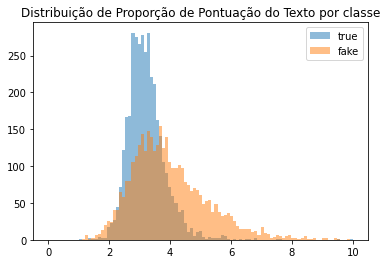

In [106]:
# Comparando distribuições de % de pontuação
%matplotlib inline
bins = np.linspace(0, 10, 100)
pyplot.hist(allnews[allnews['classe']==1]['prop_pont'], bins, alpha=0.5, label='true')
pyplot.hist(allnews[allnews['classe']==0]['prop_pont'], bins, alpha=0.5, label='fake')
pyplot.legend(loc='best')
pyplot.title("Distribuição de Proporção de Pontuação do Texto por classe")
pyplot.show()

In [107]:
# Criando feature binária acerca da presença de depoimentos aspea
pd.set_option('display.max_colwidth',1000)
lista = allnews['texto'].tolist()
lista[0]

'Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação pat

In [0]:
# Função pra testar se notícia tem depoimento
import re
def temDepoimento(texto):
    """
    Recebe uma string e traz como resultado 1 se houver depoimento no formado
    aspas duplas + palavras/espaços intercalados + aspas duplas + vírgula +
    palavra.
    
    """
    resultado = int(bool(re.search("\".+\", \w+", texto)))
    return resultado

In [109]:
# Criação de nova feature temDepoimento, com 0 para False e 1 para True.
allnews['temDepoimento'] = allnews['texto'].apply(lambda x: temDepoimento(x))
allnews.head()

,texto,classe,tamanho,prop_pont,temDepoimento
0,"Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação ...",0,860,3.5,0
1,"Dr. Ray peita Bolsonaro, chama-o de conservador fake em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses (ou algo do tipo). Deveria ter dito: Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto medo de venda aos chineses é pretexto para evitar a privatização....",0,1260,2.7,0
2,"Reinaldo Azevedo desmascarado pela Polícia Federal. O mais ferrenho crítico do presidenciável Jair Bolsonaro foi desmascarado em um grampo telefônico em conversas com a irmã de Aécio Neves. Na conversa eles debochavam do juiz Sergio Moro e da operação Lava Jato.\n\nAgora ficou clara a intenção do jornalista de fazer defesas tão ferrenhas dos tucanos em suas colunas na Veja e Jovem Pan. Amigo íntimo da família Neves e do alto tucanato ele fazia propaganda psdbista ao invés de jornalismo. O jornalista Reinaldo Azevedo teve uma conversa com Andrea Neves, irmã do senador afastado Aécio Neves, interceptada pela Polícia Federal. O assunto tratado são as acusações contra Aécio contidas na delação da Odebrecht.\n\nNo diálogo, ele classificou uma reportagem da revista Veja, onde trabalhava e foi demitido, como nojenta. Ele se referia à edição que trouxe Aécio na capa, com o título A vez de Aécio.\n\nReinaldo criticou também o procurador-geral da República, Rodrigo Janot. Ele dizia que o...",0,1392,1.9,0
3,"Relatório assustador do BNDES mostra dinheiro público DO BRASIL jorrando em países comunistas. . Um relatório intitulado ""BNDES: Transformado em Robin Hood às Avessas"" mostra como o BNDES, influenciado pelo governo petista, conseguiu beneficiar um pequeno percentual de empresas (escolhidas a dedo) e afundou a instituição com dívidas astronômicas. De autoria da deputada Cristiane Brasil, o documento foi apresentado na CPI do BNDES e mostra como o PT se apossou do banco para conceder benefícios a países ""comunistas"". Um trecho do documento destaca a existência de ""contratos secretos, suspeitas de prática de atos de corrupção e a criação de empresas de fachada para beneficiar países como Cuba, Angola, Venezuela, República Dominicana, Guatemala e outros"". Cristiane apontou uma gama de irregularidades na concessão de créditos e relatou que não houve respeito aos procedimentos da própria 

In [110]:
allnews.iloc[0]

texto            Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. 

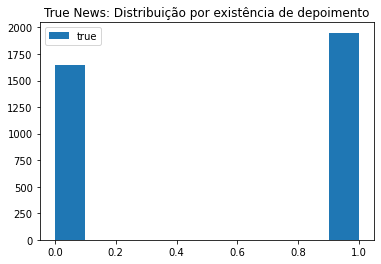

In [111]:
# Comparando distribuições de tamanho do texto
pyplot.hist(allnews[allnews['classe']==1]['temDepoimento'], label='true')
pyplot.legend(loc='best')
pyplot.title("True News: Distribuição por existência de depoimento")
pyplot.show()

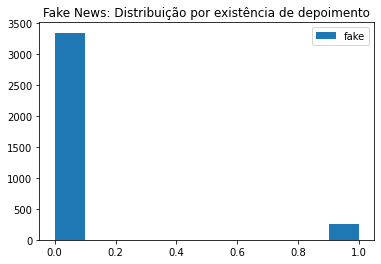

In [112]:
pyplot.hist(allnews[allnews['classe']==0]['temDepoimento'], label='fake')
pyplot.legend(loc='best')
pyplot.title("Fake News: Distribuição por existência de depoimento")
pyplot.show()

In [113]:
!pip install spacy
!python -m spacy download pt
import spacy
nlp = spacy.load("pt")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [0]:
def tokenizer(texto):
    
    """
    Recebe uma string e traz como resultado duas listas:
    1) lista tokens, contendo tokens SEM remoção de pontuação, stopwords etc

    Spacy deve estar instalado: !pip install spacy
    É necessário fazer download do modelo pt do spacy: !python -m spacy download pt
    É necessário importar o spacy: import spacy
    É necessário carregar o modelo na variável nlp: nlp = spacy.load("pt") 

    """
    
    doc = nlp(texto)
    tokens = []
    for token in doc:
      tokens.append(token.text)
    return tokens

In [0]:
def pos_tagger(texto):
    
    """
    Recebe uma string e traz como resultado duas listas:
    2) lista pos_tags, contendo POS tags correspondentes 

    Spacy deve estar instalado: !pip install spacy
    É necessário fazer download do modelo pt do spacy: !python -m spacy download pt
    É necessário importar o spacy: import spacy
    É necessário carregar o modelo na variável nlp: nlp = spacy.load("pt") 

    """
    
    doc = nlp(texto)
    pos_tags = []
    for token in doc:
      pos_tags.append(spacy.explain(token.pos_))
    return pos_tags

In [116]:
tokens = tokenizer("O Bolsonaro é um idiota")
tokens

['O', 'Bolsonaro', 'é', 'um', 'idiota']

In [117]:
pos_tags = pos_tagger("O insistente presidente Bolsonaro demitiu o pacato ministro Mandetta")
pos_tags

2

In [118]:
allnews['tokens'] = allnews['texto'].apply(lambda x: tokenizer(x))
allnews.head()
#allnews['adjetivos'] = allnews['texto'].apply(lambda x: len(x) - x.count(" "))

,texto,classe,tamanho,prop_pont,temDepoimento,tokens
0,"Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação ...",0,860,3.5,0,"[Kátia, Abreu, diz, que, vai, colocar, sua, expulsão, em, uma, moldura, ,, mas, não, para, de, reclamar, ., \t\n\n, A, senadora, Kátia, Abreu, (, sem, partido-TO, ), disse, que, sua, expulsão, do, PMDB, foi, resultado, de, uma, ação, da, cúpula, atual, da, legenda, que, ,, segundo, ela, ,, é, oportunista, ., \n\n, “, Amanhã, eu, vou, botar, numa, moldura, dourada, a, minha, expulsão, ,, porque, das, mãos, de, onde, veio, ,, é, um, atestado, de, boa, conduta, para, o, meu, currículo, ., Essas, pessoas, que, me, expulsaram, não, servem, a, o, país, ., Eles, se, servem, do, país, em, seus, ...]"
1,"Dr. Ray peita Bolsonaro, chama-o de conservador fake em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses (ou algo do tipo). Deveria ter dito: Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto medo de venda aos chineses é pretexto para evitar a privatização....",0,1260,2.7,0,"[Dr., Ray, peita, Bolsonaro, ,, chama-o, de, conservador, fake, em, entrevista, a, Danilo, Gentili, e, divide, a, direita, ., \n\n, Este, site, vem, avisando, Jair, Bolsonaro, que, ele, deveria, abandonar, a, pauta, estatista, de, vez, e, fazer, um, discurso, mais, convincente, para, aquela, boa, parte, dos, liberais, e, conservadores, do, Brasil, que, querem, se, ver, livres, das, amarras, estatais, ., \n\n, Tudo, bem, que, as, pesquisas, ainda, dizem, que, a, maior, parte, do, povo, é, contra, as, privatizações, ,, mas, o, índice, (, pouco, mais, de, 50, %, do, povo, ), é, fácil, de, ser, revertido, ., Ademais, ,, Bolsonaro, ...]"
2,"Reinaldo Azevedo desmascarado pela Polícia Federal. O mais ferrenho crítico do presidenciável Jair Bolsonaro foi desmascarado em um grampo telefônico em conversas com a irmã de Aécio Neves. Na conversa eles debochavam do juiz Sergio Moro e da operação Lava Jato.\n\nAgora ficou clara a intenção do jornalista de fazer defesas tão ferrenhas dos tucanos em suas colunas na Veja e Jovem Pan. Amigo íntimo da família Neves e do alto tucanato ele fazia propaganda psdbista ao invés de jornalismo. O jornalista Reinaldo Azevedo teve uma conversa com Andrea Neves, irmã do senador afastado Aécio Neves, interceptada pela Polícia Federal. O assunto tratado são as acusações 

,texto,classe,tamanho,prop_pont,temDepoimento,tokens
0,"Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação ...",0,860,3.5,0,"[Kátia, Abreu, diz, que, vai, colocar, sua, expulsão, em, uma, moldura, ,, mas, não, para, de, reclamar, ., \t\n\n, A, senadora, Kátia, Abreu, (, sem, partido-TO, ), disse, que, sua, expulsão, do, PMDB, foi, resultado, de, uma, ação, da, cúpula, atual, da, legenda, que, ,, segundo, ela, ,, é, oportunista, ., \n\n, “, Amanhã, eu, vou, botar, numa, moldura, dourada, a, minha, expulsão, ,, porque, das, mãos, de, onde, veio, ,, é, um, atestado, de, boa, conduta, para, o, meu, currículo, ., Essas, pessoas, que, me, expulsaram, não, servem, a, o, país, ., Eles, se, servem, do, país, em, seus, ...]"
1,"Dr. Ray peita Bolsonaro, chama-o de conservador fake em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses (ou algo do tipo). Deveria ter dito: Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto medo de venda aos chineses é pretexto para evitar a privatização....",0,1260,2.7,0,"[Dr., Ray, peita, Bolsonaro, ,, chama-o, de, conservador, fake, em, entrevista, a, Danilo, Gentili, e, divide, a, direita, ., \n\n, Este, site, vem, avisando, Jair, Bolsonaro, que, ele, deveria, abandonar, a, pauta, estatista, de, vez, e, fazer, um, discurso, mais, convincente, para, aquela, boa, parte, dos, liberais, e, conservadores, do, Brasil, que, querem, se, ver, livres, das, amarras, estatais, ., \n\n, Tudo, bem, que, as, pesquisas, ainda, dizem, que, a, maior, parte, do, povo, é, contra, as, privatizações, ,, mas, o, índice, (, pouco, mais, de, 50, %, do, povo, ), é, fácil, de, ser, revertido, ., Ademais, ,, Bolsonaro, ...]"
2,"Reinaldo Azevedo desmascarado pela Polícia Federal. O mais ferrenho crítico do presidenciável Jair Bolsonaro foi desmascarado em um grampo telefônico em conversas com a irmã de Aécio Neves. Na conversa eles debochavam do juiz Sergio Moro e da operação Lava Jato.\n\nAgora ficou clara a intenção do jornalista de fazer defesas tão ferrenhas dos tucanos em suas colunas na Veja e Jovem Pan. Amigo íntimo da família Neves e do alto tucanato ele fazia propaganda psdbista ao invés de jornalismo. O jornalista Reinaldo Azevedo teve uma conversa com Andrea Neves, irmã do senador afastado Aécio Neves, interceptada pela Polícia Federal. O assunto tratado são as acusações 